In [1]:
import json
import os
import time
import ipyparallel as ipp

import matplotlib.pyplot as plt
import torch
import train_cluster_cifar_dfca_tf as DFCA
import pickle

import numpy as np

from util import *

2025-06-17 12:11:50.075360: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750155110.101219 3803180 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750155110.106999 3803180 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750155110.121991 3803180 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750155110.122008 3803180 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750155110.122010 3803180 computation_placer.cc:177] computation placer alr

Instructions for updating:
non-resource variables are not supported in the long term


Reads Config file and prepares the arguments you can choose in the config_dfca.json/config_ifca.json

In [2]:
# theoretically irrelevant here because we initialize the model seed randomly (see find_good_initializer())
seeds = [11,12,13]
learning_rates = [0.25]

dfca_gi = []
ifca = []

Running the dfca-gi experiment

In [3]:
import json
import time
import torch
import numpy as np


with open("config.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------DFCA-GI, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)

        exp = DFCA.TrainCIFARCluster(config)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    dfca_gi.append(res_mean)



---------------------------------DFCA-GI, lr: 0.25, seed: 11---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 600, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 11, 'train_seed': 11, 'project_dir': 'output'}


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


I0000 00:00:1750155118.602548 3803180 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38484 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750155118.604576 3803180 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750155118.606381 3803180 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 38484 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750155118.607765 3803180 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 24198 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
I0000 00:00:1750155118.643589 3803180 mlir_graph_optimization_pa

finding good initializer from train data


2025-06-17 12:11:59.115258: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


I0000 00:00:1750155121.290647 3803912 cuda_dnn.cc:529] Loaded cuDNN version 90501


2025-06-17 12:12:05.553378: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-17 12:12:10.368890: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-17 12:12:14.315018: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-17 12:12:20.052530: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-17 12:12:24.258049: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-17 12:12:28.430334: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-17 12:12:34.131096: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


found good initializer


Epoch 0 tr: l 4.547 a 0.138  clct[np.int64(64), np.int64(36)] ans[np.int64(45), np.int64(55)] lr 0.250000 cl_acc 0.690 41.523sec(train) 4.606sec(infer)


Epoch 0 tst: l 4.541 a 0.144  clct[np.int64(25), np.int64(15)] ans[np.int64(20), np.int64(20)] cl_acc 0.725 1.692sec
result written at output/results.pickle


Epoch 10 tr: l 3.229 a 0.347  clct[np.int64(0), np.int64(100)] ans[np.int64(46), np.int64(54)] lr 0.226096 cl_acc 0.540 39.356sec(train) 5.671sec(infer)


Epoch 10 tst: l 3.217 a 0.371  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.890sec
result written at output/results.pickle


Epoch 20 tr: l 2.575 a 0.409  clct[np.int64(0), np.int64(100)] ans[np.int64(50), np.int64(50)] lr 0.204477 cl_acc 0.500 38.893sec(train) 3.804sec(infer)


Epoch 20 tst: l 2.531 a 0.431  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.555sec
result written at output/results.pickle


Epoch 30 tr: l 2.173 a 0.462  clct[np.int64(0), np.int64(100)] ans[np.int64(51), np.int64(49)] lr 0.184925 cl_acc 0.510 38.805sec(train) 3.966sec(infer)


Epoch 30 tst: l 2.114 a 0.486  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.843sec
result written at output/results.pickle


Epoch 40 tr: l 1.908 a 0.500  clct[np.int64(0), np.int64(100)] ans[np.int64(47), np.int64(53)] lr 0.167243 cl_acc 0.530 39.601sec(train) 5.477sec(infer)


Epoch 40 tst: l 1.835 a 0.531  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.004sec
result written at output/results.pickle


Epoch 50 tr: l 1.687 a 0.545  clct[np.int64(0), np.int64(100)] ans[np.int64(49), np.int64(51)] lr 0.151252 cl_acc 0.510 37.369sec(train) 4.949sec(infer)


Epoch 50 tst: l 1.618 a 0.570  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.645sec
result written at output/results.pickle


Epoch 60 tr: l 1.531 a 0.578  clct[np.int64(0), np.int64(100)] ans[np.int64(44), np.int64(56)] lr 0.136789 cl_acc 0.560 38.320sec(train) 4.028sec(infer)


Epoch 60 tst: l 1.486 a 0.591  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.623sec
result written at output/results.pickle


Epoch 70 tr: l 1.434 a 0.596  clct[np.int64(0), np.int64(100)] ans[np.int64(49), np.int64(51)] lr 0.123710 cl_acc 0.510 36.746sec(train) 4.565sec(infer)


Epoch 70 tst: l 1.373 a 0.615  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.649sec
result written at output/results.pickle


Epoch 80 tr: l 1.372 a 0.603  clct[np.int64(0), np.int64(100)] ans[np.int64(51), np.int64(49)] lr 0.111881 cl_acc 0.510 37.773sec(train) 4.456sec(infer)


Epoch 80 tst: l 1.288 a 0.633  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.621sec
result written at output/results.pickle


Epoch 90 tr: l 1.277 a 0.629  clct[np.int64(0), np.int64(100)] ans[np.int64(48), np.int64(52)] lr 0.101183 cl_acc 0.520 36.963sec(train) 4.990sec(infer)


Epoch 90 tst: l 1.234 a 0.643  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.921sec
result written at output/results.pickle


Epoch 100 tr: l 1.233 a 0.637  clct[np.int64(0), np.int64(100)] ans[np.int64(48), np.int64(52)] lr 0.091508 cl_acc 0.520 44.370sec(train) 5.499sec(infer)


Epoch 100 tst: l 1.181 a 0.656  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.982sec
result written at output/results.pickle


Epoch 110 tr: l 1.167 a 0.657  clct[np.int64(0), np.int64(100)] ans[np.int64(50), np.int64(50)] lr 0.082758 cl_acc 0.500 42.287sec(train) 5.184sec(infer)


Epoch 110 tst: l 1.135 a 0.667  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.036sec
result written at output/results.pickle


Epoch 120 tr: l 1.142 a 0.660  clct[np.int64(0), np.int64(100)] ans[np.int64(55), np.int64(45)] lr 0.074845 cl_acc 0.550 37.668sec(train) 3.943sec(infer)


Epoch 120 tst: l 1.098 a 0.678  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.648sec
result written at output/results.pickle


Epoch 130 tr: l 1.103 a 0.675  clct[np.int64(0), np.int64(100)] ans[np.int64(49), np.int64(51)] lr 0.067689 cl_acc 0.510 38.444sec(train) 5.126sec(infer)


Epoch 130 tst: l 1.078 a 0.680  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.958sec
result written at output/results.pickle


Epoch 140 tr: l 1.072 a 0.679  clct[np.int64(0), np.int64(100)] ans[np.int64(45), np.int64(55)] lr 0.061216 cl_acc 0.550 37.882sec(train) 4.897sec(infer)


Epoch 140 tst: l 1.046 a 0.689  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.540sec
result written at output/results.pickle


Epoch 150 tr: l 1.033 a 0.692  clct[np.int64(0), np.int64(100)] ans[np.int64(46), np.int64(54)] lr 0.055363 cl_acc 0.540 39.575sec(train) 4.758sec(infer)


Epoch 150 tst: l 1.039 a 0.691  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.589sec
result written at output/results.pickle


Epoch 160 tr: l 1.035 a 0.692  clct[np.int64(0), np.int64(100)] ans[np.int64(44), np.int64(56)] lr 0.050069 cl_acc 0.560 39.454sec(train) 4.091sec(infer)


Epoch 160 tst: l 1.005 a 0.702  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.596sec
result written at output/results.pickle


Epoch 170 tr: l 0.988 a 0.707  clct[np.int64(0), np.int64(100)] ans[np.int64(55), np.int64(45)] lr 0.045282 cl_acc 0.550 36.861sec(train) 4.701sec(infer)


Epoch 170 tst: l 0.991 a 0.704  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.553sec
result written at output/results.pickle


Epoch 180 tr: l 0.959 a 0.714  clct[np.int64(0), np.int64(100)] ans[np.int64(42), np.int64(58)] lr 0.040952 cl_acc 0.580 38.773sec(train) 4.514sec(infer)


Epoch 180 tst: l 0.976 a 0.709  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.811sec
result written at output/results.pickle


Epoch 190 tr: l 0.971 a 0.707  clct[np.int64(0), np.int64(100)] ans[np.int64(46), np.int64(54)] lr 0.037036 cl_acc 0.540 44.419sec(train) 4.575sec(infer)


Epoch 190 tst: l 0.963 a 0.712  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.614sec
result written at output/results.pickle


Epoch 200 tr: l 0.933 a 0.721  clct[np.int64(0), np.int64(100)] ans[np.int64(51), np.int64(49)] lr 0.033495 cl_acc 0.510 42.547sec(train) 5.309sec(infer)


Epoch 200 tst: l 0.955 a 0.715  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.776sec
result written at output/results.pickle


Epoch 210 tr: l 0.927 a 0.721  clct[np.int64(0), np.int64(100)] ans[np.int64(50), np.int64(50)] lr 0.030292 cl_acc 0.500 37.249sec(train) 4.631sec(infer)


Epoch 210 tst: l 0.942 a 0.716  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.646sec
result written at output/results.pickle


Epoch 220 tr: l 0.908 a 0.729  clct[np.int64(0), np.int64(100)] ans[np.int64(46), np.int64(54)] lr 0.027396 cl_acc 0.540 44.324sec(train) 5.096sec(infer)


Epoch 220 tst: l 0.938 a 0.718  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.725sec
result written at output/results.pickle


Epoch 230 tr: l 0.876 a 0.740  clct[np.int64(0), np.int64(100)] ans[np.int64(50), np.int64(50)] lr 0.024776 cl_acc 0.500 39.025sec(train) 4.919sec(infer)


Epoch 230 tst: l 0.935 a 0.720  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.912sec
result written at output/results.pickle


Epoch 240 tr: l 0.917 a 0.723  clct[np.int64(0), np.int64(100)] ans[np.int64(47), np.int64(53)] lr 0.022407 cl_acc 0.530 37.266sec(train) 4.958sec(infer)


Epoch 240 tst: l 0.918 a 0.725  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.757sec
result written at output/results.pickle


Epoch 250 tr: l 0.875 a 0.736  clct[np.int64(0), np.int64(100)] ans[np.int64(47), np.int64(53)] lr 0.020265 cl_acc 0.530 45.011sec(train) 5.269sec(infer)


Epoch 250 tst: l 0.914 a 0.726  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.666sec
result written at output/results.pickle


Epoch 260 tr: l 0.873 a 0.735  clct[np.int64(0), np.int64(100)] ans[np.int64(58), np.int64(42)] lr 0.018327 cl_acc 0.580 42.238sec(train) 5.690sec(infer)


Epoch 260 tst: l 0.914 a 0.725  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.966sec
result written at output/results.pickle


Epoch 270 tr: l 0.888 a 0.730  clct[np.int64(0), np.int64(100)] ans[np.int64(43), np.int64(57)] lr 0.016575 cl_acc 0.570 39.310sec(train) 4.971sec(infer)


Epoch 270 tst: l 0.898 a 0.730  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.679sec
result written at output/results.pickle


Epoch 280 tr: l 0.872 a 0.736  clct[np.int64(0), np.int64(100)] ans[np.int64(52), np.int64(48)] lr 0.014990 cl_acc 0.520 39.923sec(train) 5.656sec(infer)


Epoch 280 tst: l 0.897 a 0.730  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.665sec
result written at output/results.pickle


Epoch 290 tr: l 0.855 a 0.740  clct[np.int64(0), np.int64(100)] ans[np.int64(51), np.int64(49)] lr 0.013556 cl_acc 0.510 39.744sec(train) 4.905sec(infer)


Epoch 290 tst: l 0.885 a 0.733  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.592sec
result written at output/results.pickle


Epoch 300 tr: l 0.846 a 0.744  clct[np.int64(0), np.int64(100)] ans[np.int64(46), np.int64(54)] lr 0.012260 cl_acc 0.540 47.791sec(train) 4.267sec(infer)


Epoch 300 tst: l 0.884 a 0.732  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.674sec
result written at output/results.pickle


Epoch 310 tr: l 0.834 a 0.746  clct[np.int64(0), np.int64(100)] ans[np.int64(48), np.int64(52)] lr 0.011088 cl_acc 0.520 37.104sec(train) 4.439sec(infer)


Epoch 310 tst: l 0.887 a 0.732  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.638sec
result written at output/results.pickle


Epoch 320 tr: l 0.841 a 0.745  clct[np.int64(0), np.int64(100)] ans[np.int64(46), np.int64(54)] lr 0.010028 cl_acc 0.540 47.883sec(train) 4.793sec(infer)


Epoch 320 tst: l 0.878 a 0.734  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.800sec
result written at output/results.pickle


Epoch 330 tr: l 0.830 a 0.747  clct[np.int64(0), np.int64(100)] ans[np.int64(50), np.int64(50)] lr 0.009069 cl_acc 0.500 39.089sec(train) 5.287sec(infer)


Epoch 330 tst: l 0.873 a 0.737  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.017sec
result written at output/results.pickle


Epoch 340 tr: l 0.819 a 0.752  clct[np.int64(0), np.int64(100)] ans[np.int64(49), np.int64(51)] lr 0.008202 cl_acc 0.510 40.434sec(train) 5.366sec(infer)


Epoch 340 tst: l 0.874 a 0.736  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.177sec
result written at output/results.pickle


Epoch 350 tr: l 0.829 a 0.748  clct[np.int64(0), np.int64(100)] ans[np.int64(45), np.int64(55)] lr 0.007418 cl_acc 0.550 40.116sec(train) 4.475sec(infer)


Epoch 350 tst: l 0.866 a 0.737  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.586sec
result written at output/results.pickle


Epoch 360 tr: l 0.827 a 0.747  clct[np.int64(0), np.int64(100)] ans[np.int64(46), np.int64(54)] lr 0.006708 cl_acc 0.540 38.611sec(train) 4.749sec(infer)


Epoch 360 tst: l 0.863 a 0.738  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.688sec
result written at output/results.pickle


Epoch 370 tr: l 0.804 a 0.756  clct[np.int64(0), np.int64(100)] ans[np.int64(50), np.int64(50)] lr 0.006067 cl_acc 0.500 38.756sec(train) 5.457sec(infer)


Epoch 370 tst: l 0.865 a 0.738  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.923sec
result written at output/results.pickle


Epoch 380 tr: l 0.832 a 0.746  clct[np.int64(0), np.int64(100)] ans[np.int64(53), np.int64(47)] lr 0.005487 cl_acc 0.530 40.189sec(train) 4.899sec(infer)


Epoch 380 tst: l 0.861 a 0.740  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.867sec
result written at output/results.pickle


Epoch 390 tr: l 0.798 a 0.758  clct[np.int64(0), np.int64(100)] ans[np.int64(49), np.int64(51)] lr 0.004962 cl_acc 0.510 45.925sec(train) 5.252sec(infer)


Epoch 390 tst: l 0.859 a 0.739  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.778sec
result written at output/results.pickle


Epoch 400 tr: l 0.801 a 0.755  clct[np.int64(0), np.int64(100)] ans[np.int64(54), np.int64(46)] lr 0.004488 cl_acc 0.540 42.793sec(train) 5.382sec(infer)


Epoch 400 tst: l 0.853 a 0.741  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.928sec
result written at output/results.pickle


Epoch 410 tr: l 0.789 a 0.758  clct[np.int64(0), np.int64(100)] ans[np.int64(48), np.int64(52)] lr 0.004059 cl_acc 0.520 39.134sec(train) 5.031sec(infer)


Epoch 410 tst: l 0.851 a 0.742  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.145sec
result written at output/results.pickle


Epoch 420 tr: l 0.798 a 0.759  clct[np.int64(0), np.int64(100)] ans[np.int64(45), np.int64(55)] lr 0.003670 cl_acc 0.550 41.374sec(train) 4.090sec(infer)


Epoch 420 tst: l 0.850 a 0.743  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.603sec
result written at output/results.pickle


Epoch 430 tr: l 0.783 a 0.761  clct[np.int64(0), np.int64(100)] ans[np.int64(44), np.int64(56)] lr 0.003320 cl_acc 0.560 48.309sec(train) 4.546sec(infer)


Epoch 430 tst: l 0.844 a 0.745  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.673sec
result written at output/results.pickle


Epoch 440 tr: l 0.788 a 0.758  clct[np.int64(0), np.int64(100)] ans[np.int64(44), np.int64(56)] lr 0.003002 cl_acc 0.560 39.659sec(train) 3.788sec(infer)


Epoch 440 tst: l 0.848 a 0.742  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.608sec
result written at output/results.pickle


Epoch 450 tr: l 0.785 a 0.762  clct[np.int64(0), np.int64(100)] ans[np.int64(43), np.int64(57)] lr 0.002715 cl_acc 0.570 39.764sec(train) 4.380sec(infer)


Epoch 450 tst: l 0.846 a 0.743  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.948sec
result written at output/results.pickle


Epoch 460 tr: l 0.783 a 0.762  clct[np.int64(0), np.int64(100)] ans[np.int64(46), np.int64(54)] lr 0.002455 cl_acc 0.540 42.379sec(train) 4.605sec(infer)


Epoch 460 tst: l 0.845 a 0.745  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.797sec
result written at output/results.pickle


Epoch 470 tr: l 0.792 a 0.758  clct[np.int64(0), np.int64(100)] ans[np.int64(50), np.int64(50)] lr 0.002221 cl_acc 0.500 47.020sec(train) 4.034sec(infer)


Epoch 470 tst: l 0.841 a 0.745  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.618sec
result written at output/results.pickle


Epoch 480 tr: l 0.788 a 0.759  clct[np.int64(0), np.int64(100)] ans[np.int64(45), np.int64(55)] lr 0.002008 cl_acc 0.550 39.423sec(train) 4.031sec(infer)


Epoch 480 tst: l 0.840 a 0.746  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.661sec
result written at output/results.pickle


Epoch 490 tr: l 0.777 a 0.764  clct[np.int64(0), np.int64(100)] ans[np.int64(49), np.int64(51)] lr 0.001816 cl_acc 0.510 42.534sec(train) 5.078sec(infer)


Epoch 490 tst: l 0.838 a 0.747  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.581sec
result written at output/results.pickle


Epoch 500 tr: l 0.789 a 0.758  clct[np.int64(0), np.int64(100)] ans[np.int64(47), np.int64(53)] lr 0.001643 cl_acc 0.530 45.910sec(train) 4.501sec(infer)


Epoch 500 tst: l 0.835 a 0.746  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.486sec
result written at output/results.pickle


Epoch 510 tr: l 0.783 a 0.761  clct[np.int64(0), np.int64(100)] ans[np.int64(49), np.int64(51)] lr 0.001486 cl_acc 0.510 39.945sec(train) 3.926sec(infer)


Epoch 510 tst: l 0.835 a 0.746  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.478sec
result written at output/results.pickle


Epoch 520 tr: l 0.766 a 0.765  clct[np.int64(0), np.int64(100)] ans[np.int64(48), np.int64(52)] lr 0.001344 cl_acc 0.520 38.462sec(train) 4.292sec(infer)


Epoch 520 tst: l 0.836 a 0.746  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.563sec
result written at output/results.pickle


Epoch 530 tr: l 0.790 a 0.758  clct[np.int64(0), np.int64(100)] ans[np.int64(52), np.int64(48)] lr 0.001215 cl_acc 0.520 38.647sec(train) 3.663sec(infer)


Epoch 530 tst: l 0.834 a 0.745  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.462sec
result written at output/results.pickle


Epoch 540 tr: l 0.788 a 0.757  clct[np.int64(0), np.int64(100)] ans[np.int64(48), np.int64(52)] lr 0.001099 cl_acc 0.520 38.568sec(train) 5.228sec(infer)


Epoch 540 tst: l 0.829 a 0.749  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.762sec
result written at output/results.pickle


Epoch 550 tr: l 0.774 a 0.761  clct[np.int64(0), np.int64(100)] ans[np.int64(50), np.int64(50)] lr 0.000994 cl_acc 0.500 42.891sec(train) 4.981sec(infer)


Epoch 550 tst: l 0.828 a 0.747  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.962sec
result written at output/results.pickle


Epoch 560 tr: l 0.779 a 0.764  clct[np.int64(0), np.int64(100)] ans[np.int64(49), np.int64(51)] lr 0.000899 cl_acc 0.510 43.661sec(train) 5.463sec(infer)


Epoch 560 tst: l 0.830 a 0.747  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.931sec
result written at output/results.pickle


Epoch 570 tr: l 0.765 a 0.763  clct[np.int64(0), np.int64(100)] ans[np.int64(46), np.int64(54)] lr 0.000813 cl_acc 0.540 39.240sec(train) 5.489sec(infer)


Epoch 570 tst: l 0.830 a 0.747  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.127sec
result written at output/results.pickle


Epoch 580 tr: l 0.777 a 0.762  clct[np.int64(0), np.int64(100)] ans[np.int64(44), np.int64(56)] lr 0.000735 cl_acc 0.560 39.380sec(train) 3.747sec(infer)


Epoch 580 tst: l 0.826 a 0.748  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.458sec
result written at output/results.pickle


Epoch 590 tr: l 0.780 a 0.762  clct[np.int64(0), np.int64(100)] ans[np.int64(48), np.int64(52)] lr 0.000665 cl_acc 0.520 36.475sec(train) 4.901sec(infer)


Epoch 590 tst: l 0.825 a 0.748  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 1.624sec
result written at output/results.pickle


result written at output/results.pickle
---train cluster Ended in 7.72 hour (27793.497 sec) 
---------------------------------DFCA-GI, lr: 0.25, seed: 12---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 600, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 12, 'train_seed': 12, 'project_dir': 'output'}


I0000 00:00:1750182910.045700 3803180 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38484 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750182910.046835 3803180 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750182910.047765 3803180 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 38484 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750182910.049106 3803180 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 24198 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-17 19:55:10.310782: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-17 19:55:16.761445: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-17 19:55:20.878639: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-17 19:55:24.789333: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-17 19:55:30.913898: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-17 19:55:36.644352: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-17 19:55:40.856580: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


found good initializer


Epoch 0 tr: l 4.544 a 0.150  clct[np.int64(65), np.int64(35)] ans[np.int64(48), np.int64(52)] lr 0.250000 cl_acc 0.630 42.780sec(train) 3.951sec(infer)


Epoch 0 tst: l 4.533 a 0.155  clct[np.int64(28), np.int64(12)] ans[np.int64(20), np.int64(20)] cl_acc 0.650 1.622sec
result written at output/results.pickle


Epoch 10 tr: l 3.186 a 0.375  clct[np.int64(44), np.int64(56)] ans[np.int64(54), np.int64(46)] lr 0.226096 cl_acc 0.980 41.790sec(train) 4.316sec(infer)


Epoch 10 tst: l 3.179 a 0.404  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.466sec
result written at output/results.pickle


Epoch 20 tr: l 2.481 a 0.458  clct[np.int64(49), np.int64(51)] ans[np.int64(51), np.int64(49)] lr 0.204477 cl_acc 1.000 39.051sec(train) 3.668sec(infer)


Epoch 20 tst: l 2.405 a 0.494  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.772sec
result written at output/results.pickle


Epoch 30 tr: l 2.026 a 0.526  clct[np.int64(49), np.int64(51)] ans[np.int64(51), np.int64(49)] lr 0.184925 cl_acc 1.000 39.480sec(train) 5.525sec(infer)


Epoch 30 tst: l 1.966 a 0.549  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.944sec
result written at output/results.pickle


Epoch 40 tr: l 1.702 a 0.586  clct[np.int64(48), np.int64(52)] ans[np.int64(52), np.int64(48)] lr 0.167243 cl_acc 1.000 41.389sec(train) 3.634sec(infer)


Epoch 40 tst: l 1.641 a 0.608  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.484sec
result written at output/results.pickle


Epoch 50 tr: l 1.477 a 0.634  clct[np.int64(59), np.int64(41)] ans[np.int64(41), np.int64(59)] lr 0.151252 cl_acc 1.000 39.100sec(train) 4.238sec(infer)


Epoch 50 tst: l 1.437 a 0.643  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.616sec
result written at output/results.pickle


Epoch 60 tr: l 1.310 a 0.664  clct[np.int64(48), np.int64(52)] ans[np.int64(52), np.int64(48)] lr 0.136789 cl_acc 1.000 41.308sec(train) 5.433sec(infer)


Epoch 60 tst: l 1.274 a 0.678  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.864sec
result written at output/results.pickle


Epoch 70 tr: l 1.208 a 0.684  clct[np.int64(46), np.int64(54)] ans[np.int64(54), np.int64(46)] lr 0.123710 cl_acc 1.000 48.367sec(train) 5.200sec(infer)


Epoch 70 tst: l 1.176 a 0.697  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.988sec
result written at output/results.pickle


Epoch 80 tr: l 1.112 a 0.702  clct[np.int64(51), np.int64(49)] ans[np.int64(49), np.int64(51)] lr 0.111881 cl_acc 1.000 41.894sec(train) 4.554sec(infer)


Epoch 80 tst: l 1.092 a 0.712  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.792sec
result written at output/results.pickle


Epoch 90 tr: l 1.049 a 0.716  clct[np.int64(52), np.int64(48)] ans[np.int64(48), np.int64(52)] lr 0.101183 cl_acc 1.000 42.448sec(train) 4.478sec(infer)


Epoch 90 tst: l 1.025 a 0.728  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.585sec
result written at output/results.pickle


Epoch 100 tr: l 0.971 a 0.737  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.091508 cl_acc 1.000 49.411sec(train) 5.179sec(infer)


Epoch 100 tst: l 0.985 a 0.735  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.021sec
result written at output/results.pickle


Epoch 110 tr: l 0.939 a 0.743  clct[np.int64(51), np.int64(49)] ans[np.int64(49), np.int64(51)] lr 0.082758 cl_acc 1.000 45.594sec(train) 5.072sec(infer)


Epoch 110 tst: l 0.942 a 0.745  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.820sec
result written at output/results.pickle


Epoch 120 tr: l 0.903 a 0.752  clct[np.int64(53), np.int64(47)] ans[np.int64(47), np.int64(53)] lr 0.074845 cl_acc 1.000 56.596sec(train) 5.870sec(infer)


Epoch 120 tst: l 0.912 a 0.750  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.050sec
result written at output/results.pickle


Epoch 130 tr: l 0.857 a 0.767  clct[np.int64(54), np.int64(46)] ans[np.int64(46), np.int64(54)] lr 0.067689 cl_acc 1.000 63.731sec(train) 5.598sec(infer)


Epoch 130 tst: l 0.895 a 0.755  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.128sec
result written at output/results.pickle


Epoch 140 tr: l 0.836 a 0.769  clct[np.int64(46), np.int64(54)] ans[np.int64(54), np.int64(46)] lr 0.061216 cl_acc 1.000 61.808sec(train) 6.318sec(infer)


Epoch 140 tst: l 0.873 a 0.758  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.396sec
result written at output/results.pickle


Epoch 150 tr: l 0.796 a 0.781  clct[np.int64(49), np.int64(51)] ans[np.int64(51), np.int64(49)] lr 0.055363 cl_acc 1.000 65.409sec(train) 6.460sec(infer)


Epoch 150 tst: l 0.867 a 0.759  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.340sec
result written at output/results.pickle


Epoch 160 tr: l 0.779 a 0.786  clct[np.int64(52), np.int64(48)] ans[np.int64(48), np.int64(52)] lr 0.050069 cl_acc 1.000 62.183sec(train) 5.608sec(infer)


Epoch 160 tst: l 0.844 a 0.762  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.044sec
result written at output/results.pickle


Epoch 170 tr: l 0.773 a 0.785  clct[np.int64(48), np.int64(52)] ans[np.int64(52), np.int64(48)] lr 0.045282 cl_acc 1.000 64.282sec(train) 5.488sec(infer)


Epoch 170 tst: l 0.822 a 0.772  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.187sec
result written at output/results.pickle


Epoch 180 tr: l 0.711 a 0.806  clct[np.int64(44), np.int64(56)] ans[np.int64(56), np.int64(44)] lr 0.040952 cl_acc 1.000 63.546sec(train) 7.478sec(infer)


Epoch 180 tst: l 0.818 a 0.773  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.361sec
result written at output/results.pickle


Epoch 190 tr: l 0.733 a 0.795  clct[np.int64(53), np.int64(47)] ans[np.int64(47), np.int64(53)] lr 0.037036 cl_acc 1.000 66.238sec(train) 6.922sec(infer)


Epoch 190 tst: l 0.798 a 0.777  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.428sec
result written at output/results.pickle


Epoch 200 tr: l 0.721 a 0.801  clct[np.int64(42), np.int64(58)] ans[np.int64(58), np.int64(42)] lr 0.033495 cl_acc 1.000 65.796sec(train) 6.812sec(infer)


Epoch 200 tst: l 0.793 a 0.779  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.228sec
result written at output/results.pickle


Epoch 210 tr: l 0.687 a 0.810  clct[np.int64(57), np.int64(43)] ans[np.int64(43), np.int64(57)] lr 0.030292 cl_acc 1.000 60.029sec(train) 5.441sec(infer)


Epoch 210 tst: l 0.793 a 0.779  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.053sec
result written at output/results.pickle


Epoch 220 tr: l 0.678 a 0.813  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.027396 cl_acc 1.000 63.160sec(train) 6.086sec(infer)


Epoch 220 tst: l 0.774 a 0.783  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.260sec
result written at output/results.pickle


Epoch 230 tr: l 0.689 a 0.809  clct[np.int64(51), np.int64(49)] ans[np.int64(49), np.int64(51)] lr 0.024776 cl_acc 1.000 66.748sec(train) 6.118sec(infer)


Epoch 230 tst: l 0.769 a 0.785  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.998sec
result written at output/results.pickle


Epoch 240 tr: l 0.651 a 0.821  clct[np.int64(43), np.int64(57)] ans[np.int64(57), np.int64(43)] lr 0.022407 cl_acc 1.000 62.704sec(train) 7.389sec(infer)


Epoch 240 tst: l 0.768 a 0.783  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.275sec
result written at output/results.pickle


Epoch 250 tr: l 0.667 a 0.815  clct[np.int64(51), np.int64(49)] ans[np.int64(49), np.int64(51)] lr 0.020265 cl_acc 1.000 70.068sec(train) 7.507sec(infer)


Epoch 250 tst: l 0.757 a 0.786  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.501sec
result written at output/results.pickle


Epoch 260 tr: l 0.647 a 0.820  clct[np.int64(49), np.int64(51)] ans[np.int64(51), np.int64(49)] lr 0.018327 cl_acc 1.000 61.705sec(train) 5.796sec(infer)


Epoch 260 tst: l 0.757 a 0.786  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.267sec
result written at output/results.pickle


Epoch 270 tr: l 0.636 a 0.822  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.016575 cl_acc 1.000 67.255sec(train) 6.076sec(infer)


Epoch 270 tst: l 0.752 a 0.787  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.383sec
result written at output/results.pickle


Epoch 280 tr: l 0.609 a 0.834  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.014990 cl_acc 1.000 64.509sec(train) 5.560sec(infer)


Epoch 280 tst: l 0.759 a 0.788  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.189sec
result written at output/results.pickle


Epoch 290 tr: l 0.604 a 0.835  clct[np.int64(47), np.int64(53)] ans[np.int64(53), np.int64(47)] lr 0.013556 cl_acc 1.000 64.772sec(train) 5.308sec(infer)


Epoch 290 tst: l 0.744 a 0.790  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.160sec
result written at output/results.pickle


Epoch 300 tr: l 0.626 a 0.826  clct[np.int64(53), np.int64(47)] ans[np.int64(47), np.int64(53)] lr 0.012260 cl_acc 1.000 61.646sec(train) 6.319sec(infer)


Epoch 300 tst: l 0.740 a 0.792  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.528sec
result written at output/results.pickle


Epoch 310 tr: l 0.595 a 0.835  clct[np.int64(53), np.int64(47)] ans[np.int64(47), np.int64(53)] lr 0.011088 cl_acc 1.000 67.105sec(train) 5.684sec(infer)


Epoch 310 tst: l 0.737 a 0.792  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.934sec
result written at output/results.pickle


Epoch 320 tr: l 0.585 a 0.839  clct[np.int64(51), np.int64(49)] ans[np.int64(49), np.int64(51)] lr 0.010028 cl_acc 1.000 62.798sec(train) 6.002sec(infer)


Epoch 320 tst: l 0.743 a 0.791  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.193sec
result written at output/results.pickle


Epoch 330 tr: l 0.592 a 0.835  clct[np.int64(49), np.int64(51)] ans[np.int64(51), np.int64(49)] lr 0.009069 cl_acc 1.000 64.921sec(train) 6.628sec(infer)


Epoch 330 tst: l 0.729 a 0.795  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.383sec
result written at output/results.pickle


Epoch 340 tr: l 0.561 a 0.847  clct[np.int64(47), np.int64(53)] ans[np.int64(53), np.int64(47)] lr 0.008202 cl_acc 1.000 67.292sec(train) 5.652sec(infer)


Epoch 340 tst: l 0.732 a 0.793  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.070sec
result written at output/results.pickle


Epoch 350 tr: l 0.600 a 0.834  clct[np.int64(45), np.int64(55)] ans[np.int64(55), np.int64(45)] lr 0.007418 cl_acc 1.000 64.092sec(train) 6.960sec(infer)


Epoch 350 tst: l 0.728 a 0.797  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.264sec
result written at output/results.pickle


Epoch 360 tr: l 0.586 a 0.838  clct[np.int64(42), np.int64(58)] ans[np.int64(58), np.int64(42)] lr 0.006708 cl_acc 1.000 61.284sec(train) 5.678sec(infer)


Epoch 360 tst: l 0.725 a 0.796  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.114sec
result written at output/results.pickle


Epoch 370 tr: l 0.577 a 0.841  clct[np.int64(57), np.int64(43)] ans[np.int64(43), np.int64(57)] lr 0.006067 cl_acc 1.000 69.729sec(train) 7.095sec(infer)


Epoch 370 tst: l 0.724 a 0.797  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.280sec
result written at output/results.pickle


Epoch 380 tr: l 0.588 a 0.834  clct[np.int64(52), np.int64(48)] ans[np.int64(48), np.int64(52)] lr 0.005487 cl_acc 1.000 69.697sec(train) 5.140sec(infer)


Epoch 380 tst: l 0.724 a 0.799  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.794sec
result written at output/results.pickle


Epoch 390 tr: l 0.579 a 0.838  clct[np.int64(56), np.int64(44)] ans[np.int64(44), np.int64(56)] lr 0.004962 cl_acc 1.000 66.351sec(train) 5.061sec(infer)


Epoch 390 tst: l 0.723 a 0.798  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.147sec
result written at output/results.pickle


Epoch 400 tr: l 0.578 a 0.838  clct[np.int64(48), np.int64(52)] ans[np.int64(52), np.int64(48)] lr 0.004488 cl_acc 1.000 70.561sec(train) 7.224sec(infer)


Epoch 400 tst: l 0.716 a 0.798  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.141sec
result written at output/results.pickle


Epoch 410 tr: l 0.561 a 0.843  clct[np.int64(53), np.int64(47)] ans[np.int64(47), np.int64(53)] lr 0.004059 cl_acc 1.000 62.517sec(train) 5.567sec(infer)


Epoch 410 tst: l 0.718 a 0.800  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.977sec
result written at output/results.pickle


Epoch 420 tr: l 0.574 a 0.839  clct[np.int64(54), np.int64(46)] ans[np.int64(46), np.int64(54)] lr 0.003670 cl_acc 1.000 62.743sec(train) 6.074sec(infer)


Epoch 420 tst: l 0.716 a 0.799  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.020sec
result written at output/results.pickle


Epoch 430 tr: l 0.562 a 0.843  clct[np.int64(55), np.int64(45)] ans[np.int64(45), np.int64(55)] lr 0.003320 cl_acc 1.000 67.530sec(train) 5.895sec(infer)


Epoch 430 tst: l 0.718 a 0.799  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.067sec
result written at output/results.pickle


Epoch 440 tr: l 0.569 a 0.841  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.003002 cl_acc 1.000 70.191sec(train) 7.245sec(infer)


Epoch 440 tst: l 0.714 a 0.799  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.005sec
result written at output/results.pickle


Epoch 450 tr: l 0.557 a 0.845  clct[np.int64(51), np.int64(49)] ans[np.int64(49), np.int64(51)] lr 0.002715 cl_acc 1.000 65.978sec(train) 6.502sec(infer)


Epoch 450 tst: l 0.713 a 0.799  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.912sec
result written at output/results.pickle


Epoch 460 tr: l 0.546 a 0.849  clct[np.int64(53), np.int64(47)] ans[np.int64(47), np.int64(53)] lr 0.002455 cl_acc 1.000 62.285sec(train) 6.369sec(infer)


Epoch 460 tst: l 0.718 a 0.797  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.190sec
result written at output/results.pickle


Epoch 470 tr: l 0.554 a 0.845  clct[np.int64(49), np.int64(51)] ans[np.int64(51), np.int64(49)] lr 0.002221 cl_acc 1.000 62.825sec(train) 5.127sec(infer)


Epoch 470 tst: l 0.712 a 0.800  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.851sec
result written at output/results.pickle


Epoch 480 tr: l 0.572 a 0.840  clct[np.int64(54), np.int64(46)] ans[np.int64(46), np.int64(54)] lr 0.002008 cl_acc 1.000 62.030sec(train) 5.136sec(infer)


Epoch 480 tst: l 0.710 a 0.800  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.077sec
result written at output/results.pickle


Epoch 490 tr: l 0.560 a 0.842  clct[np.int64(53), np.int64(47)] ans[np.int64(47), np.int64(53)] lr 0.001816 cl_acc 1.000 61.923sec(train) 5.139sec(infer)


Epoch 490 tst: l 0.710 a 0.799  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.807sec
result written at output/results.pickle


Epoch 500 tr: l 0.547 a 0.846  clct[np.int64(45), np.int64(55)] ans[np.int64(55), np.int64(45)] lr 0.001643 cl_acc 1.000 67.705sec(train) 5.870sec(infer)


Epoch 500 tst: l 0.710 a 0.801  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.050sec
result written at output/results.pickle


Epoch 510 tr: l 0.549 a 0.846  clct[np.int64(48), np.int64(52)] ans[np.int64(52), np.int64(48)] lr 0.001486 cl_acc 1.000 66.031sec(train) 5.027sec(infer)


Epoch 510 tst: l 0.708 a 0.800  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.889sec
result written at output/results.pickle


Epoch 520 tr: l 0.553 a 0.847  clct[np.int64(46), np.int64(54)] ans[np.int64(54), np.int64(46)] lr 0.001344 cl_acc 1.000 60.443sec(train) 5.958sec(infer)


Epoch 520 tst: l 0.707 a 0.800  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.054sec
result written at output/results.pickle


Epoch 530 tr: l 0.547 a 0.847  clct[np.int64(51), np.int64(49)] ans[np.int64(49), np.int64(51)] lr 0.001215 cl_acc 1.000 67.057sec(train) 6.671sec(infer)


Epoch 530 tst: l 0.706 a 0.800  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.514sec
result written at output/results.pickle


Epoch 540 tr: l 0.549 a 0.847  clct[np.int64(49), np.int64(51)] ans[np.int64(51), np.int64(49)] lr 0.001099 cl_acc 1.000 69.740sec(train) 6.706sec(infer)


Epoch 540 tst: l 0.706 a 0.801  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.578sec
result written at output/results.pickle


Epoch 550 tr: l 0.550 a 0.847  clct[np.int64(51), np.int64(49)] ans[np.int64(49), np.int64(51)] lr 0.000994 cl_acc 1.000 64.411sec(train) 5.833sec(infer)


Epoch 550 tst: l 0.705 a 0.801  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.291sec
result written at output/results.pickle


Epoch 560 tr: l 0.555 a 0.842  clct[np.int64(48), np.int64(52)] ans[np.int64(52), np.int64(48)] lr 0.000899 cl_acc 1.000 61.161sec(train) 6.748sec(infer)


Epoch 560 tst: l 0.703 a 0.801  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.220sec
result written at output/results.pickle


Epoch 570 tr: l 0.560 a 0.843  clct[np.int64(48), np.int64(52)] ans[np.int64(52), np.int64(48)] lr 0.000813 cl_acc 1.000 61.431sec(train) 5.299sec(infer)


Epoch 570 tst: l 0.703 a 0.801  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.926sec
result written at output/results.pickle


Epoch 580 tr: l 0.553 a 0.846  clct[np.int64(56), np.int64(44)] ans[np.int64(44), np.int64(56)] lr 0.000735 cl_acc 1.000 62.438sec(train) 5.535sec(infer)


Epoch 580 tst: l 0.703 a 0.801  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.109sec
result written at output/results.pickle


Epoch 590 tr: l 0.570 a 0.840  clct[np.int64(49), np.int64(51)] ans[np.int64(51), np.int64(49)] lr 0.000665 cl_acc 1.000 67.948sec(train) 5.588sec(infer)


Epoch 590 tst: l 0.702 a 0.802  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.837sec
result written at output/results.pickle


result written at output/results.pickle
---train cluster Ended in 11.28 hour (40617.731 sec) 
---------------------------------DFCA-GI, lr: 0.25, seed: 13---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.5, 'num_epochs': 600, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 13, 'train_seed': 13, 'project_dir': 'output'}


I0000 00:00:1750223528.510667 3803180 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38484 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1750223528.512103 3803180 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 33986 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1750223528.513213 3803180 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 38484 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
I0000 00:00:1750223528.514989 3803180 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 24198 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


finding good initializer from train data


2025-06-18 07:12:08.951436: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-18 07:12:15.947839: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-18 07:12:20.979117: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-18 07:12:26.249262: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2025-06-18 07:12:32.637572: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


found good initializer


Epoch 0 tr: l 4.549 a 0.143  clct[np.int64(53), np.int64(47)] ans[np.int64(50), np.int64(50)] lr 0.250000 cl_acc 0.730 65.810sec(train) 5.665sec(infer)


Epoch 0 tst: l 4.522 a 0.146  clct[np.int64(18), np.int64(22)] ans[np.int64(20), np.int64(20)] cl_acc 0.750 1.987sec
result written at output/results.pickle


Epoch 10 tr: l 3.264 a 0.353  clct[np.int64(1), np.int64(99)] ans[np.int64(45), np.int64(55)] lr 0.226096 cl_acc 0.560 66.417sec(train) 6.932sec(infer)


Epoch 10 tst: l 3.182 a 0.385  clct[np.int64(1), np.int64(39)] ans[np.int64(20), np.int64(20)] cl_acc 0.525 2.394sec
result written at output/results.pickle


Epoch 20 tr: l 2.579 a 0.413  clct[np.int64(1), np.int64(99)] ans[np.int64(50), np.int64(50)] lr 0.204477 cl_acc 0.510 67.746sec(train) 6.604sec(infer)


Epoch 20 tst: l 2.526 a 0.441  clct[np.int64(0), np.int64(40)] ans[np.int64(20), np.int64(20)] cl_acc 0.500 2.505sec
result written at output/results.pickle


Epoch 30 tr: l 2.051 a 0.514  clct[np.int64(52), np.int64(48)] ans[np.int64(52), np.int64(48)] lr 0.184925 cl_acc 1.000 65.727sec(train) 5.514sec(infer)


Epoch 30 tst: l 1.986 a 0.542  clct[np.int64(19), np.int64(21)] ans[np.int64(20), np.int64(20)] cl_acc 0.975 1.818sec
result written at output/results.pickle


Epoch 40 tr: l 1.737 a 0.568  clct[np.int64(54), np.int64(46)] ans[np.int64(54), np.int64(46)] lr 0.167243 cl_acc 1.000 67.075sec(train) 5.659sec(infer)


Epoch 40 tst: l 1.665 a 0.598  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.804sec
result written at output/results.pickle


Epoch 50 tr: l 1.488 a 0.621  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.151252 cl_acc 1.000 63.927sec(train) 6.479sec(infer)


Epoch 50 tst: l 1.456 a 0.633  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.120sec
result written at output/results.pickle


Epoch 60 tr: l 1.329 a 0.654  clct[np.int64(53), np.int64(47)] ans[np.int64(53), np.int64(47)] lr 0.136789 cl_acc 1.000 64.218sec(train) 5.822sec(infer)


Epoch 60 tst: l 1.304 a 0.665  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.903sec
result written at output/results.pickle


Epoch 70 tr: l 1.200 a 0.685  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.123710 cl_acc 1.000 65.332sec(train) 5.529sec(infer)


Epoch 70 tst: l 1.173 a 0.693  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.846sec
result written at output/results.pickle


Epoch 80 tr: l 1.079 a 0.715  clct[np.int64(53), np.int64(47)] ans[np.int64(53), np.int64(47)] lr 0.111881 cl_acc 1.000 65.136sec(train) 7.622sec(infer)


Epoch 80 tst: l 1.103 a 0.705  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.495sec
result written at output/results.pickle


Epoch 90 tr: l 1.053 a 0.715  clct[np.int64(46), np.int64(54)] ans[np.int64(46), np.int64(54)] lr 0.101183 cl_acc 1.000 66.929sec(train) 5.918sec(infer)


Epoch 90 tst: l 1.044 a 0.722  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.886sec
result written at output/results.pickle


Epoch 100 tr: l 0.976 a 0.736  clct[np.int64(55), np.int64(45)] ans[np.int64(55), np.int64(45)] lr 0.091508 cl_acc 1.000 62.850sec(train) 7.018sec(infer)


Epoch 100 tst: l 1.002 a 0.730  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.233sec
result written at output/results.pickle


Epoch 110 tr: l 0.945 a 0.740  clct[np.int64(55), np.int64(45)] ans[np.int64(55), np.int64(45)] lr 0.082758 cl_acc 1.000 63.829sec(train) 5.078sec(infer)


Epoch 110 tst: l 0.953 a 0.739  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.942sec
result written at output/results.pickle


Epoch 120 tr: l 0.889 a 0.756  clct[np.int64(54), np.int64(46)] ans[np.int64(54), np.int64(46)] lr 0.074845 cl_acc 1.000 64.988sec(train) 7.321sec(infer)


Epoch 120 tst: l 0.938 a 0.741  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.589sec
result written at output/results.pickle


Epoch 130 tr: l 0.856 a 0.766  clct[np.int64(55), np.int64(45)] ans[np.int64(55), np.int64(45)] lr 0.067689 cl_acc 1.000 65.128sec(train) 6.421sec(infer)


Epoch 130 tst: l 0.903 a 0.751  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.948sec
result written at output/results.pickle


Epoch 140 tr: l 0.842 a 0.767  clct[np.int64(53), np.int64(47)] ans[np.int64(53), np.int64(47)] lr 0.061216 cl_acc 1.000 67.970sec(train) 5.276sec(infer)


Epoch 140 tst: l 0.890 a 0.753  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.232sec
result written at output/results.pickle


Epoch 150 tr: l 0.784 a 0.783  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.055363 cl_acc 1.000 66.024sec(train) 5.225sec(infer)


Epoch 150 tst: l 0.864 a 0.762  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.703sec
result written at output/results.pickle


Epoch 160 tr: l 0.785 a 0.782  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.050069 cl_acc 1.000 60.665sec(train) 5.959sec(infer)


Epoch 160 tst: l 0.855 a 0.764  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.985sec
result written at output/results.pickle


Epoch 170 tr: l 0.755 a 0.791  clct[np.int64(52), np.int64(48)] ans[np.int64(52), np.int64(48)] lr 0.045282 cl_acc 1.000 65.184sec(train) 5.116sec(infer)


Epoch 170 tst: l 0.845 a 0.764  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.097sec
result written at output/results.pickle


Epoch 180 tr: l 0.718 a 0.804  clct[np.int64(54), np.int64(46)] ans[np.int64(54), np.int64(46)] lr 0.040952 cl_acc 1.000 66.413sec(train) 6.232sec(infer)


Epoch 180 tst: l 0.819 a 0.772  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.160sec
result written at output/results.pickle


Epoch 190 tr: l 0.699 a 0.808  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.037036 cl_acc 1.000 61.865sec(train) 5.441sec(infer)


Epoch 190 tst: l 0.814 a 0.772  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.915sec
result written at output/results.pickle


Epoch 200 tr: l 0.710 a 0.803  clct[np.int64(45), np.int64(55)] ans[np.int64(45), np.int64(55)] lr 0.033495 cl_acc 1.000 65.239sec(train) 5.960sec(infer)


Epoch 200 tst: l 0.798 a 0.778  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.820sec
result written at output/results.pickle


Epoch 210 tr: l 0.705 a 0.806  clct[np.int64(51), np.int64(49)] ans[np.int64(51), np.int64(49)] lr 0.030292 cl_acc 1.000 68.777sec(train) 5.552sec(infer)


Epoch 210 tst: l 0.791 a 0.778  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.968sec
result written at output/results.pickle


Epoch 220 tr: l 0.712 a 0.802  clct[np.int64(52), np.int64(48)] ans[np.int64(52), np.int64(48)] lr 0.027396 cl_acc 1.000 63.244sec(train) 5.840sec(infer)


Epoch 220 tst: l 0.786 a 0.781  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.941sec
result written at output/results.pickle


Epoch 230 tr: l 0.660 a 0.819  clct[np.int64(52), np.int64(48)] ans[np.int64(52), np.int64(48)] lr 0.024776 cl_acc 1.000 60.797sec(train) 5.904sec(infer)


Epoch 230 tst: l 0.790 a 0.780  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.907sec
result written at output/results.pickle


Epoch 240 tr: l 0.661 a 0.816  clct[np.int64(54), np.int64(46)] ans[np.int64(54), np.int64(46)] lr 0.022407 cl_acc 1.000 66.077sec(train) 5.393sec(infer)


Epoch 240 tst: l 0.780 a 0.782  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.124sec
result written at output/results.pickle


Epoch 250 tr: l 0.653 a 0.820  clct[np.int64(47), np.int64(53)] ans[np.int64(47), np.int64(53)] lr 0.020265 cl_acc 1.000 64.499sec(train) 5.623sec(infer)


Epoch 250 tst: l 0.761 a 0.788  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.115sec
result written at output/results.pickle


Epoch 260 tr: l 0.634 a 0.824  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.018327 cl_acc 1.000 65.164sec(train) 6.415sec(infer)


Epoch 260 tst: l 0.764 a 0.787  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.017sec
result written at output/results.pickle


Epoch 270 tr: l 0.638 a 0.822  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.016575 cl_acc 1.000 65.621sec(train) 5.025sec(infer)


Epoch 270 tst: l 0.756 a 0.788  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.517sec
result written at output/results.pickle


Epoch 280 tr: l 0.653 a 0.818  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.014990 cl_acc 1.000 67.304sec(train) 6.057sec(infer)


Epoch 280 tst: l 0.752 a 0.791  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.184sec
result written at output/results.pickle


Epoch 290 tr: l 0.624 a 0.825  clct[np.int64(54), np.int64(46)] ans[np.int64(54), np.int64(46)] lr 0.013556 cl_acc 1.000 68.538sec(train) 6.290sec(infer)


Epoch 290 tst: l 0.746 a 0.791  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.166sec
result written at output/results.pickle


Epoch 300 tr: l 0.622 a 0.824  clct[np.int64(47), np.int64(53)] ans[np.int64(47), np.int64(53)] lr 0.012260 cl_acc 1.000 68.805sec(train) 6.074sec(infer)


Epoch 300 tst: l 0.743 a 0.792  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.098sec
result written at output/results.pickle


Epoch 310 tr: l 0.624 a 0.827  clct[np.int64(57), np.int64(43)] ans[np.int64(57), np.int64(43)] lr 0.011088 cl_acc 1.000 68.921sec(train) 5.625sec(infer)


Epoch 310 tst: l 0.742 a 0.793  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.880sec
result written at output/results.pickle


Epoch 320 tr: l 0.585 a 0.839  clct[np.int64(54), np.int64(46)] ans[np.int64(54), np.int64(46)] lr 0.010028 cl_acc 1.000 67.952sec(train) 5.863sec(infer)


Epoch 320 tst: l 0.738 a 0.794  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.051sec
result written at output/results.pickle


Epoch 330 tr: l 0.592 a 0.837  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.009069 cl_acc 1.000 60.116sec(train) 5.107sec(infer)


Epoch 330 tst: l 0.742 a 0.793  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.873sec
result written at output/results.pickle


Epoch 340 tr: l 0.598 a 0.835  clct[np.int64(55), np.int64(45)] ans[np.int64(55), np.int64(45)] lr 0.008202 cl_acc 1.000 64.645sec(train) 5.574sec(infer)


Epoch 340 tst: l 0.734 a 0.796  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.971sec
result written at output/results.pickle


Epoch 350 tr: l 0.579 a 0.839  clct[np.int64(51), np.int64(49)] ans[np.int64(51), np.int64(49)] lr 0.007418 cl_acc 1.000 64.327sec(train) 5.487sec(infer)


Epoch 350 tst: l 0.732 a 0.795  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.889sec
result written at output/results.pickle


Epoch 360 tr: l 0.595 a 0.834  clct[np.int64(52), np.int64(48)] ans[np.int64(52), np.int64(48)] lr 0.006708 cl_acc 1.000 62.106sec(train) 5.111sec(infer)


Epoch 360 tst: l 0.731 a 0.796  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.935sec
result written at output/results.pickle


Epoch 370 tr: l 0.581 a 0.838  clct[np.int64(51), np.int64(49)] ans[np.int64(51), np.int64(49)] lr 0.006067 cl_acc 1.000 66.548sec(train) 6.225sec(infer)


Epoch 370 tst: l 0.729 a 0.798  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.126sec
result written at output/results.pickle


Epoch 380 tr: l 0.590 a 0.835  clct[np.int64(59), np.int64(41)] ans[np.int64(59), np.int64(41)] lr 0.005487 cl_acc 1.000 63.386sec(train) 5.220sec(infer)


Epoch 380 tst: l 0.733 a 0.797  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.021sec
result written at output/results.pickle


Epoch 390 tr: l 0.564 a 0.845  clct[np.int64(48), np.int64(52)] ans[np.int64(48), np.int64(52)] lr 0.004962 cl_acc 1.000 69.466sec(train) 6.724sec(infer)


Epoch 390 tst: l 0.728 a 0.797  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.534sec
result written at output/results.pickle


Epoch 400 tr: l 0.568 a 0.843  clct[np.int64(55), np.int64(45)] ans[np.int64(55), np.int64(45)] lr 0.004488 cl_acc 1.000 66.053sec(train) 6.275sec(infer)


Epoch 400 tst: l 0.727 a 0.797  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.994sec
result written at output/results.pickle


Epoch 410 tr: l 0.580 a 0.838  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.004059 cl_acc 1.000 68.831sec(train) 7.034sec(infer)


Epoch 410 tst: l 0.727 a 0.797  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.016sec
result written at output/results.pickle


Epoch 420 tr: l 0.565 a 0.845  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.003670 cl_acc 1.000 67.800sec(train) 5.406sec(infer)


Epoch 420 tst: l 0.723 a 0.799  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.878sec
result written at output/results.pickle


Epoch 430 tr: l 0.566 a 0.842  clct[np.int64(47), np.int64(53)] ans[np.int64(47), np.int64(53)] lr 0.003320 cl_acc 1.000 66.604sec(train) 4.827sec(infer)


Epoch 430 tst: l 0.724 a 0.798  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.940sec
result written at output/results.pickle


Epoch 440 tr: l 0.570 a 0.840  clct[np.int64(48), np.int64(52)] ans[np.int64(48), np.int64(52)] lr 0.003002 cl_acc 1.000 59.876sec(train) 5.859sec(infer)


Epoch 440 tst: l 0.719 a 0.799  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.001sec
result written at output/results.pickle


Epoch 450 tr: l 0.563 a 0.844  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.002715 cl_acc 1.000 61.934sec(train) 5.643sec(infer)


Epoch 450 tst: l 0.718 a 0.801  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.883sec
result written at output/results.pickle


Epoch 460 tr: l 0.565 a 0.843  clct[np.int64(47), np.int64(53)] ans[np.int64(47), np.int64(53)] lr 0.002455 cl_acc 1.000 64.689sec(train) 5.468sec(infer)


Epoch 460 tst: l 0.718 a 0.800  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.973sec
result written at output/results.pickle


Epoch 470 tr: l 0.558 a 0.845  clct[np.int64(55), np.int64(45)] ans[np.int64(55), np.int64(45)] lr 0.002221 cl_acc 1.000 68.835sec(train) 5.666sec(infer)


Epoch 470 tst: l 0.720 a 0.800  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.075sec
result written at output/results.pickle


Epoch 480 tr: l 0.546 a 0.849  clct[np.int64(51), np.int64(49)] ans[np.int64(51), np.int64(49)] lr 0.002008 cl_acc 1.000 64.609sec(train) 6.014sec(infer)


Epoch 480 tst: l 0.718 a 0.800  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.176sec
result written at output/results.pickle


Epoch 490 tr: l 0.573 a 0.840  clct[np.int64(47), np.int64(53)] ans[np.int64(47), np.int64(53)] lr 0.001816 cl_acc 1.000 59.983sec(train) 5.284sec(infer)


Epoch 490 tst: l 0.717 a 0.799  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.046sec
result written at output/results.pickle


Epoch 500 tr: l 0.558 a 0.843  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.001643 cl_acc 1.000 61.379sec(train) 5.387sec(infer)


Epoch 500 tst: l 0.716 a 0.799  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.099sec
result written at output/results.pickle


Epoch 510 tr: l 0.562 a 0.840  clct[np.int64(53), np.int64(47)] ans[np.int64(53), np.int64(47)] lr 0.001486 cl_acc 1.000 60.695sec(train) 6.327sec(infer)


Epoch 510 tst: l 0.714 a 0.801  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.135sec
result written at output/results.pickle


Epoch 520 tr: l 0.572 a 0.839  clct[np.int64(52), np.int64(48)] ans[np.int64(52), np.int64(48)] lr 0.001344 cl_acc 1.000 65.424sec(train) 5.322sec(infer)


Epoch 520 tst: l 0.713 a 0.800  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.895sec
result written at output/results.pickle


Epoch 530 tr: l 0.543 a 0.848  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.001215 cl_acc 1.000 65.263sec(train) 6.783sec(infer)


Epoch 530 tst: l 0.714 a 0.799  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.250sec
result written at output/results.pickle


Epoch 540 tr: l 0.532 a 0.854  clct[np.int64(50), np.int64(50)] ans[np.int64(50), np.int64(50)] lr 0.001099 cl_acc 1.000 61.776sec(train) 7.310sec(infer)


Epoch 540 tst: l 0.713 a 0.800  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.133sec
result written at output/results.pickle


Epoch 550 tr: l 0.554 a 0.844  clct[np.int64(58), np.int64(42)] ans[np.int64(58), np.int64(42)] lr 0.000994 cl_acc 1.000 63.482sec(train) 5.149sec(infer)


Epoch 550 tst: l 0.712 a 0.800  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 1.895sec
result written at output/results.pickle


Epoch 560 tr: l 0.573 a 0.836  clct[np.int64(52), np.int64(48)] ans[np.int64(52), np.int64(48)] lr 0.000899 cl_acc 1.000 65.866sec(train) 5.382sec(infer)


Epoch 560 tst: l 0.710 a 0.800  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.106sec
result written at output/results.pickle


Epoch 570 tr: l 0.558 a 0.844  clct[np.int64(46), np.int64(54)] ans[np.int64(46), np.int64(54)] lr 0.000813 cl_acc 1.000 61.920sec(train) 5.373sec(infer)


Epoch 570 tst: l 0.709 a 0.800  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.059sec
result written at output/results.pickle


Epoch 580 tr: l 0.569 a 0.841  clct[np.int64(53), np.int64(47)] ans[np.int64(53), np.int64(47)] lr 0.000735 cl_acc 1.000 67.164sec(train) 5.324sec(infer)


Epoch 580 tst: l 0.709 a 0.800  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.057sec
result written at output/results.pickle


Epoch 590 tr: l 0.552 a 0.844  clct[np.int64(49), np.int64(51)] ans[np.int64(49), np.int64(51)] lr 0.000665 cl_acc 1.000 63.225sec(train) 6.775sec(infer)


Epoch 590 tst: l 0.709 a 0.800  clct[np.int64(20), np.int64(20)] ans[np.int64(20), np.int64(20)] cl_acc 1.000 2.283sec
result written at output/results.pickle


result written at output/results.pickle
---train cluster Ended in 12.23 hour (44031.567 sec) 


## Plots

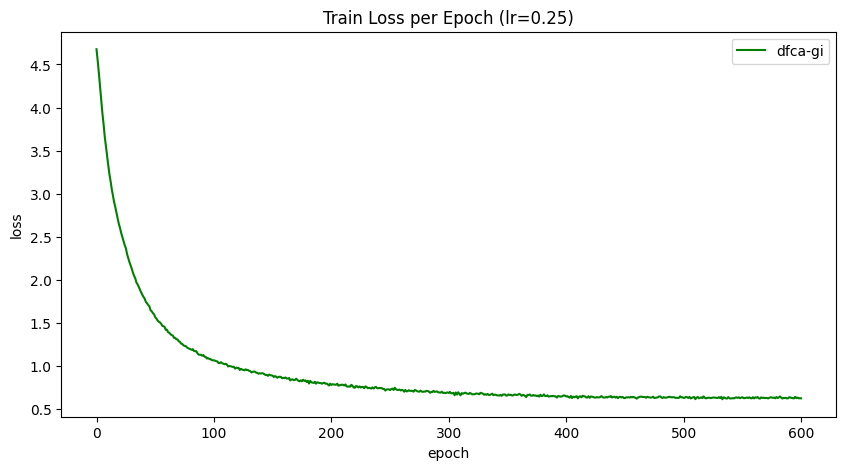

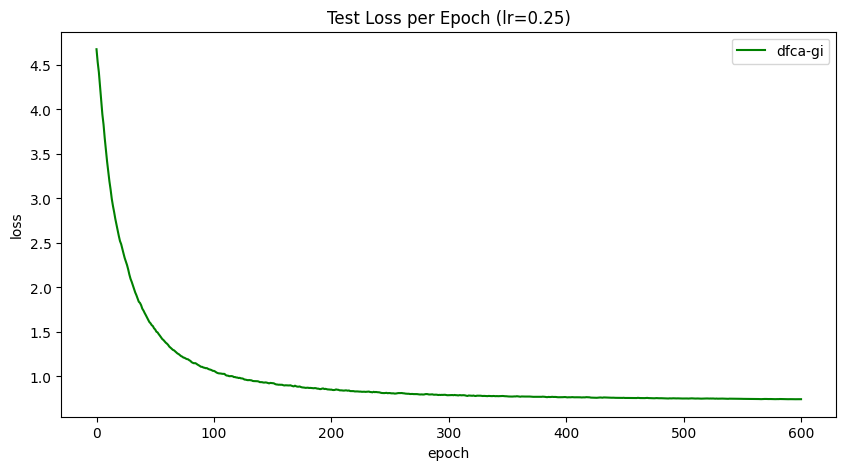

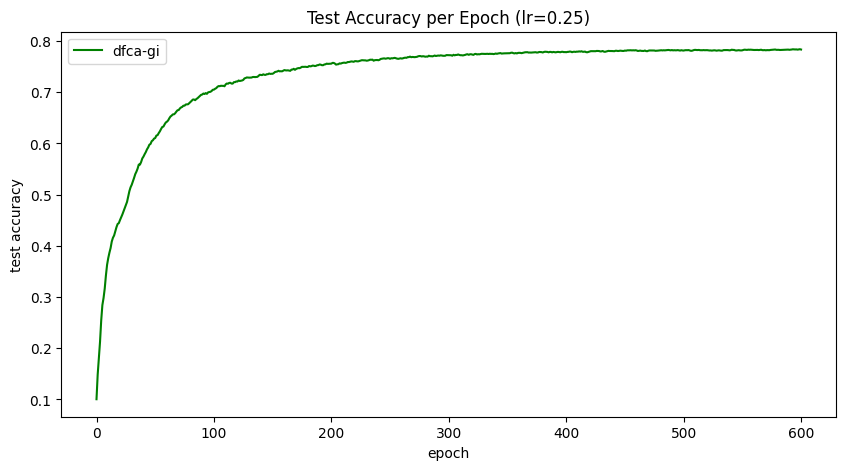

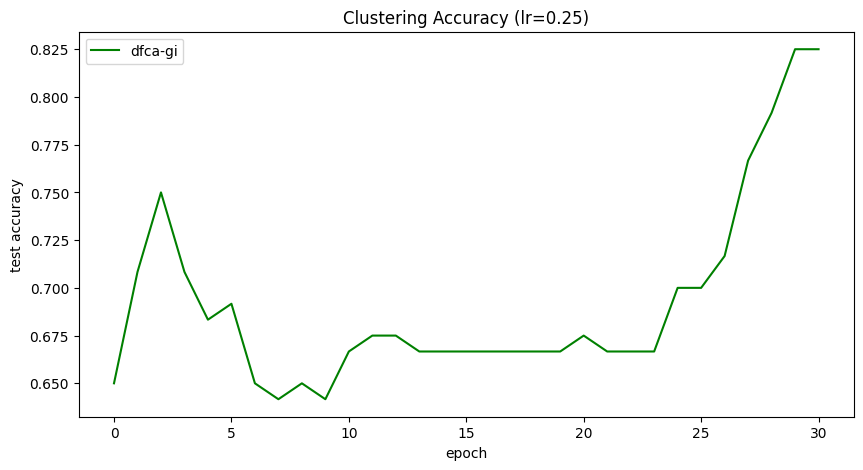

In [4]:

r_dfca_gi = {}

r_dfca_gi['test_loss'] = []
r_dfca_gi['test_acc'] = []
r_dfca_gi['cl_acc'] = []
r_dfca_gi['train_loss'] = []
for i in range(len(learning_rates)):
    r_dfca_gi['test_loss'].append(dfca_gi[i][0])
    r_dfca_gi['test_acc'].append(dfca_gi[i][1])
    r_dfca_gi['cl_acc'].append(dfca_gi[i][2])
    r_dfca_gi['train_loss'].append(dfca_gi[i][3])

with open('res_dfca.pickle', 'wb') as f:
    pickle.dump(r_dfca_gi, f)

os.makedirs('graphs', exist_ok=True)

for l in range(len(learning_rates)):

    plt.figure(figsize=(10,5))
    plt.plot(r_dfca_gi['train_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'Train Loss per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.savefig(os.path.join('graphs', '3_train_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_dfca_gi['test_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'Test Loss per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.savefig(os.path.join('graphs', '3_test_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_dfca_gi['test_acc'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.title(f'Test Accuracy per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.savefig(os.path.join('graphs', '3_test_acc.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_dfca_gi['cl_acc'][l][:31], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.title(f'Clustering Accuracy (lr={learning_rates[l]})')
    plt.legend()
    plt.savefig(os.path.join('graphs', '3_cl_acc.png'))

